# Proyek Pertama Machine Learning Terapan - Predictive Analytics
- **Nama:** Nabilah Wanara
- **Email:** 	mc006d5x211p@student.devacademy.id
- **ID Dicoding:** MC006D5X2119

##Import Library

In [165]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

##Data Loading

In [166]:
# Load dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [167]:
kemiskinan = '/content/drive/MyDrive/ML Terapan/Klasifikasi Tingkat Kemiskinan di Indonesia.csv'
df = pd.read_csv(kemiskinan, sep=';')
df

,Provinsi,Kab/Kota,Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun),Indeks Pembangunan Manusia,Tingkat Pengangguran Terbuka,Klasifikasi Kemiskinan
0,ACEH,Simeulue,"18,98",7148,"66,41","5,71",0
1,ACEH,Aceh Singkil,"20,36",8776,"69,22","8,36",1
2,ACEH,Aceh Selatan,"13,18",8180,"67,44","6,46",0
3,ACEH,Aceh Tenggara,"13,41",8030,"69,44","6,43",0
4,ACEH,Aceh Timur,"14,45",8577,"67,83","7,13",0
...,...,...,...,...,...,...,...
509,PAPUA,Puncak,"36,26",5412,"43,17","0,94",1
510,PAPUA,Dogiyai,"28,81",5415,55,"5,68",1
511,PAPUA,Intan Jaya,"41,66",5328,"48,34","1,43",1
512,PAPUA,Deiyai,"40,59",4673,"49,96","0,79",1


##EDA (Exploratory Data Analysis)

In [168]:
# Ringkasan dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 7 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   Provinsi                                                         514 non-null    object
 1   Kab/Kota                                                         514 non-null    object
 2   Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)  514 non-null    object
 3   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)     514 non-null    int64 
 4   Indeks Pembangunan Manusia                                       514 non-null    object
 5   Tingkat Pengangguran Terbuka                                     514 non-null    object
 6   Klasifikasi Kemiskinan                                           514 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 28.2+ KB


DataFrame memiliki 7 kolom dengan 514 baris data


Terdapat kolom yang memiliki tipe data yang belum sesuai, yaitu kolom Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen), Indeks Pembangunan Manusia, dan Tingkat Pengangguran Terbuka yang seharusnya bertipe float

In [169]:
# Mengganti nama kolom agar lebih mudah untuk melakukan EDA
df = df.rename(columns={
    'Provinsi': 'provinsi',
    'Kab/Kota': 'kab/kota',
    'Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)': 'persen_kemiskinan_kota',
    'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)': 'pengeluaran_kapita(ribu/tahun)',
    'Indeks Pembangunan Manusia': 'IPM',
    'Tingkat Pengangguran Terbuka': 'tingkat_pengangguran',
    'Klasifikasi Kemiskinan': 'klasifikasi_kemiskinan'
    })

Mengganti nama kolom agar lebih mudah untuk melakukan EDA agar menjadi lebih ringkas

In [170]:
# Mengubah tipe data object dari kolom yang memiliki tipe data yang kurang tepat menjadi float
df['persen_kemiskinan_kota'] = df['persen_kemiskinan_kota'].astype(str).str.replace(',', '.').astype(float)
df['IPM'] = df['IPM'].astype(str).str.replace(',', '.').astype(float)
df['tingkat_pengangguran'] = df['tingkat_pengangguran'].astype(str).str.replace(',', '.').astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   provinsi                        514 non-null    object 
 1   kab/kota                        514 non-null    object 
 2   persen_kemiskinan_kota          514 non-null    float64
 3   pengeluaran_kapita(ribu/tahun)  514 non-null    int64  
 4   IPM                             514 non-null    float64
 5   tingkat_pengangguran            514 non-null    float64
 6   klasifikasi_kemiskinan          514 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 28.2+ KB


###Data Cleaning

In [171]:
# Cek missing values
df.isnull().sum()

,0
provinsi,0
kab/kota,0
persen_kemiskinan_kota,0
pengeluaran_kapita(ribu/tahun),0
IPM,0
tingkat_pengangguran,0
klasifikasi_kemiskinan,0


In [172]:
# Cek duplicated values
df.duplicated().sum()

np.int64(0)

Berdasarkan pengecekan missing values dan duplicated values tidak terlihat adanya missing values dan duplicated values jadi tidak perlu penanganan lebih lanjut

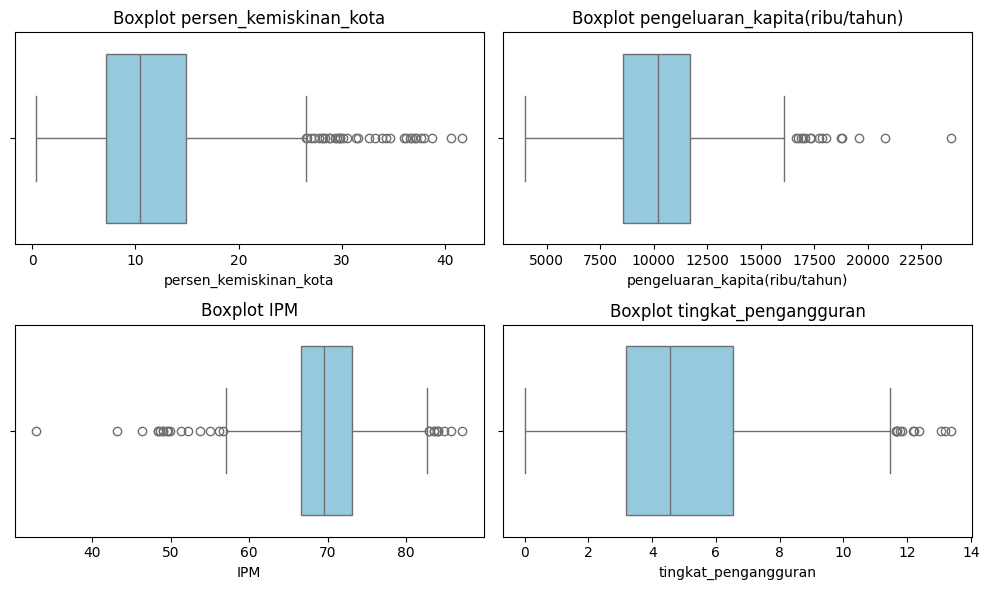

In [173]:
# Cek Outliers pada fitur numerik
outlier = df.drop(columns=['provinsi', 'kab/kota', 'klasifikasi_kemiskinan'])

# Plot boxplot tiap kolom
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
axes = axes.flatten()
for i, column in enumerate(outlier):
    sns.boxplot(x=outlier[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot {column}')
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Berdasarkan Boxplot pada kolom numerik terdapat beberapa outlier yang perlu ditangani

In [174]:
# Menangani outliers menggunakan IQR Method
Q1 = outlier.quantile(0.25)
Q3 = outlier.quantile(0.75)
IQR = Q3-Q1

df = df[~((outlier<(Q1-1.5*IQR))|(outlier>(Q3+1.5*IQR))).any(axis=1)]

In [175]:
# Ukuran data setelah penanganan outlier
print(f"ukuran data : {df.shape}")

ukuran data : (449, 7)


In [176]:
# Statistik deskriptif
df.describe()

,persen_kemiskinan_kota,pengeluaran_kapita(ribu/tahun),IPM,tingkat_pengangguran,klasifikasi_kemiskinan
count,449.000000,449.000000,449.000000,449.000000,449.000000
mean,11.052006,10311.922049,70.342405,4.972494,0.064588
std,5.117489,2044.391634,4.454188,2.271246,0.246072
min,0.400694,5780.000000,58.700000,0.700000,0.000000
25%,7.170000,8850.000000,67.190000,3.320000,0.000000
50%,10.240000,10221.000000,69.660000,4.570000,0.000000
75%,14.040000,11608.000000,72.730000,6.270000,0.000000
max,26.500000,16095.000000,82.620000,11.320000,1.000000


Setelah menangani outlier, dataset kini terdiri dari 449 baris dan 7 kolom.

Insight Statistik Deskriptif:

- Mayoritas wilayah memiliki persentase penduduk miskin di bawah 14%, meskipun ada beberapa daerah yang angkanya cukup tinggi hingga mencapai 26.5%.

- Pengeluaran per kapita menunjukkan ketimpangan yang besar antar wilayah, berkisar dari 5.78 juta hingga 16 juta rupiah per tahun.

- Indeks Pembangunan Manusia (IPM) rata-rata berada di angka 70, dengan selisih yang cukup jauh antara daerah dengan IPM terendah (58.7) dan tertinggi (82.6).

- Tingkat pengangguran di sejumlah daerah mencapai 11%, menandakan adanya ketimpangan dalam akses kesempatan kerja antar wilayah.

- Distribusi label target pada klasifikasi kemiskinan sangat timpang: hanya 6.45% data masuk kategori miskin, sedangkan sisanya 93.55% tidak miskin. Hal ini menunjukkan perlunya penanganan ketidakseimbangan kelas dalam pelatihan model, misalnya dengan SMOTE, undersampling, atau penyesuaian bobot kelas.

###UniVariate

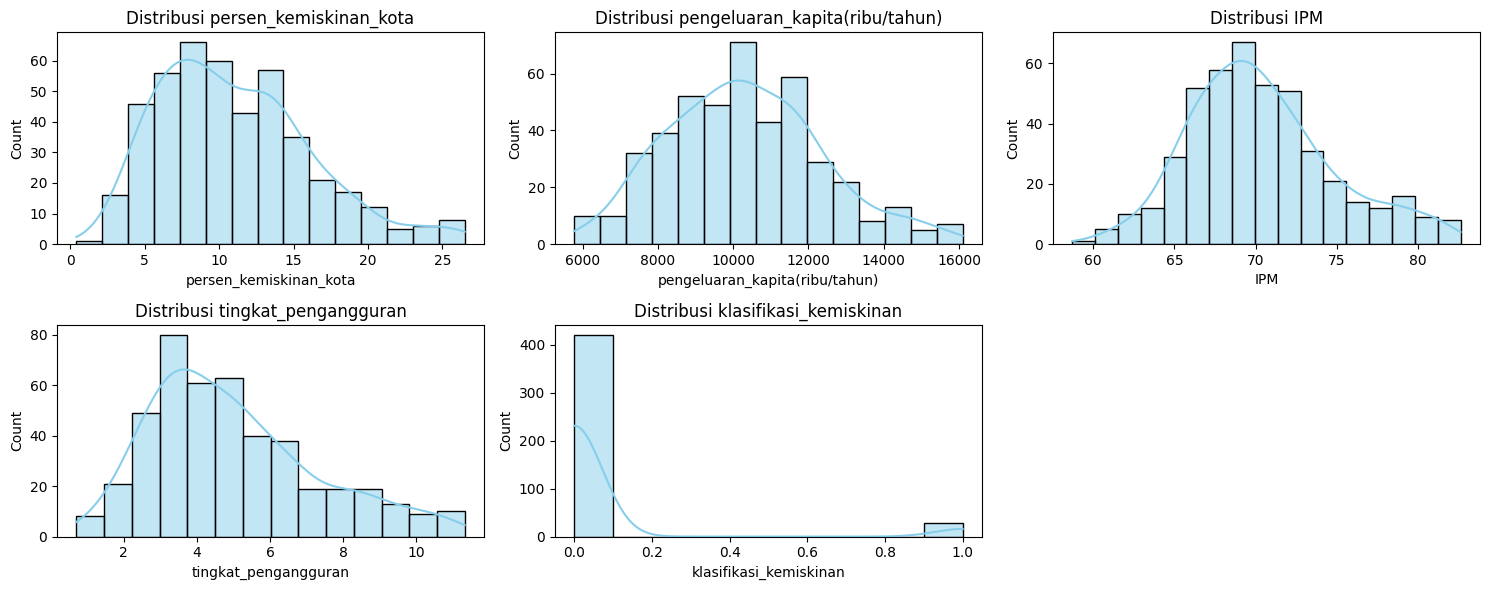

In [177]:
# Plot distribusi histogram untuk semua fitur numerik
numerical_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(15, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

- **Distribusi persen_kemiskinan_kota**

  Distribusinya tampak sedikit condong ke kanan (positively skewed), menandakan bahwa sebagian besar kota memiliki tingkat kemiskinan yang rendah. Namun, terdapat sejumlah kota dengan angka kemiskinan tinggi yang menarik distribusi ke arah kanan.

- **Distribusi pengeluaran_kapita (ribu/tahun)**

  Pola distribusinya mendekati normal atau sedikit condong ke kiri (negatively skewed). Ini mengindikasikan bahwa sebagian besar populasi memiliki pengeluaran di sekitar nilai tengah, meskipun ada beberapa daerah dengan pengeluaran yang lebih rendah.

- **Distribusi IPM**

  Indeks Pembangunan Manusia cenderung memiliki distribusi yang simetris atau hampir normal. Hal ini menunjukkan bahwa nilai IPM antar wilayah relatif merata tanpa perbedaan ekstrem.

- **Distribusi tingkat_pengangguran**

  Distribusi tingkat pengangguran terlihat miring ke kanan (positively skewed), yang berarti sebagian besar daerah memiliki angka pengangguran yang rendah, namun terdapat beberapa wilayah dengan tingkat pengangguran tinggi yang memperpanjang ekor ke kanan.

- **Distribusi klasifikasi_kemiskinan**

  Distribusinya sangat timpang: mayoritas individu berada dalam kategori tidak miskin (nilai 0), sementara hanya sebagian kecil yang diklasifikasikan sebagai miskin (nilai 1).

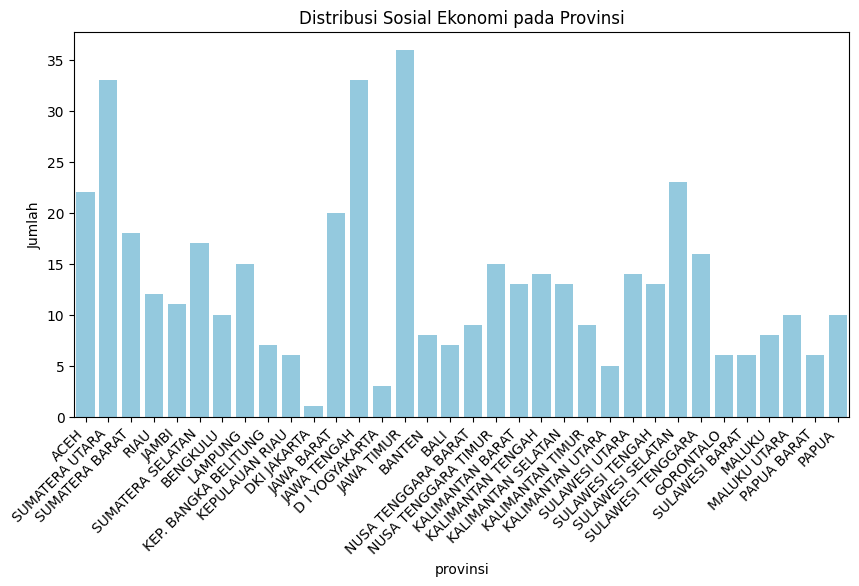

In [178]:
# Distribusi data pada kolom provinsi
plt.figure(figsize=(10, 5))
sns.countplot(x='provinsi', data=df, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Distribusi Sosial Ekonomi pada Provinsi')
plt.ylabel('Jumlah')
plt.show()

Distribusi data pada kolom provinsi :

Data dengan sedikit kontribusi ada di provinsi DKI Jakarta
dan kontribusi data paling banyak ada di provinsi Jawa Timur

In [179]:
# Banyaknya nama kabupaten/kota yang ada didalam data
df['kab/kota'].nunique()

449

###MultiVariate

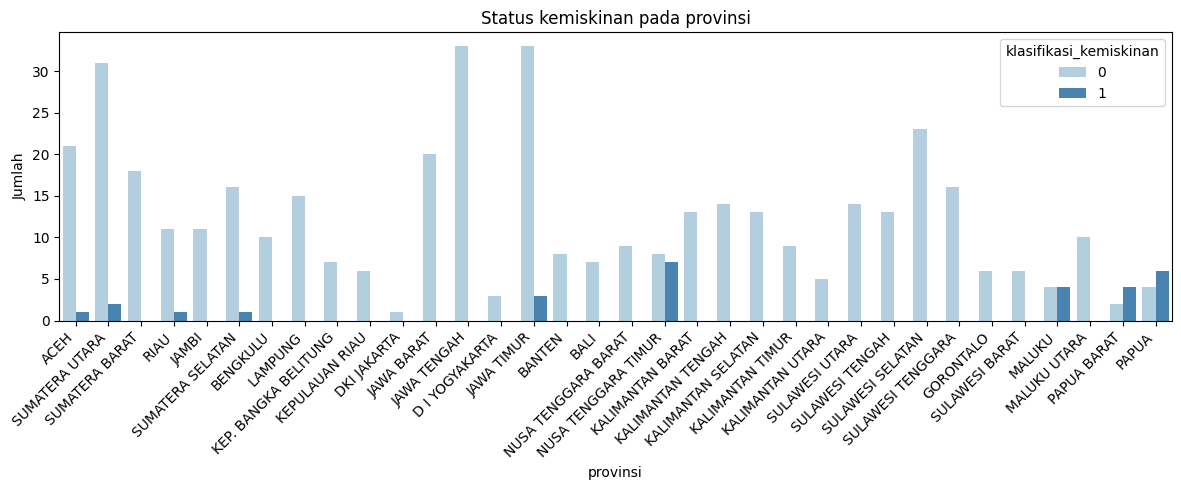

In [180]:
# data kemiskinan pada kolom provinsi
plt.figure(figsize=(12, 5))
sns.countplot(x='provinsi', hue='klasifikasi_kemiskinan', data=df, palette='Blues')
plt.xticks(rotation=45, ha='right')
plt.title('Status kemiskinan pada provinsi')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

**Pola Kemiskinan Antar Provinsi:**

Distribusi kategori kemiskinan (0 = tidak miskin, 1 = miskin) sangat bervariasi antar provinsi. Di banyak provinsi, jumlah penduduk yang tidak miskin mendominasi, meskipun selisihnya dengan kategori miskin tidak selalu besar. Beberapa provinsi justru menunjukkan jumlah penduduk miskin yang sebanding atau bahkan lebih tinggi daripada yang tidak miskin.

**Insight Umum:**

Banyak provinsi menunjukkan dominasi kategori "0" (tidak miskin), menandakan bahwa proporsi penduduk miskin relatif kecil di wilayah-wilayah tersebut.

**Contoh Provinsi Khusus:**

1. Aceh : Terlihat jelas dominasi kategori 0 (tidak miskin) dibanding kategori 1 (miskin).

2. Papua : Menarik karena jumlah penduduk dalam kategori 1 (miskin) lebih besar dibanding kategori 0.

3. Nusa Tenggara Timur & Maluku : Distribusi kategori 0 dan 1 relatif seimbang, menunjukkan tingkat kemiskinan yang cukup tinggi dan menyebar.



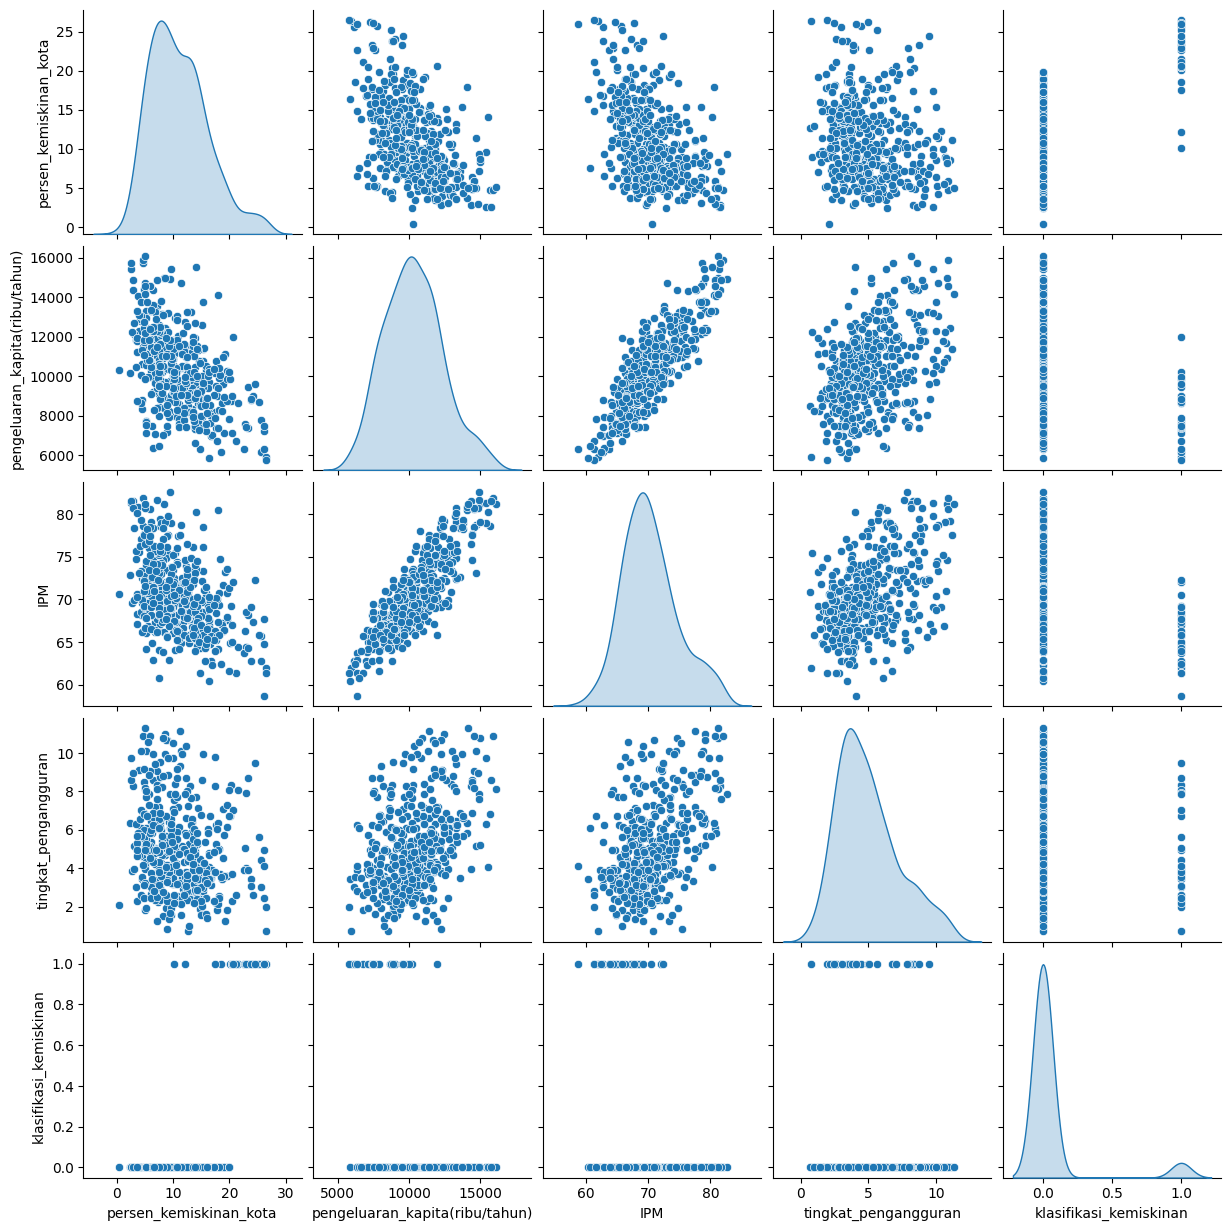

In [181]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind = 'kde')

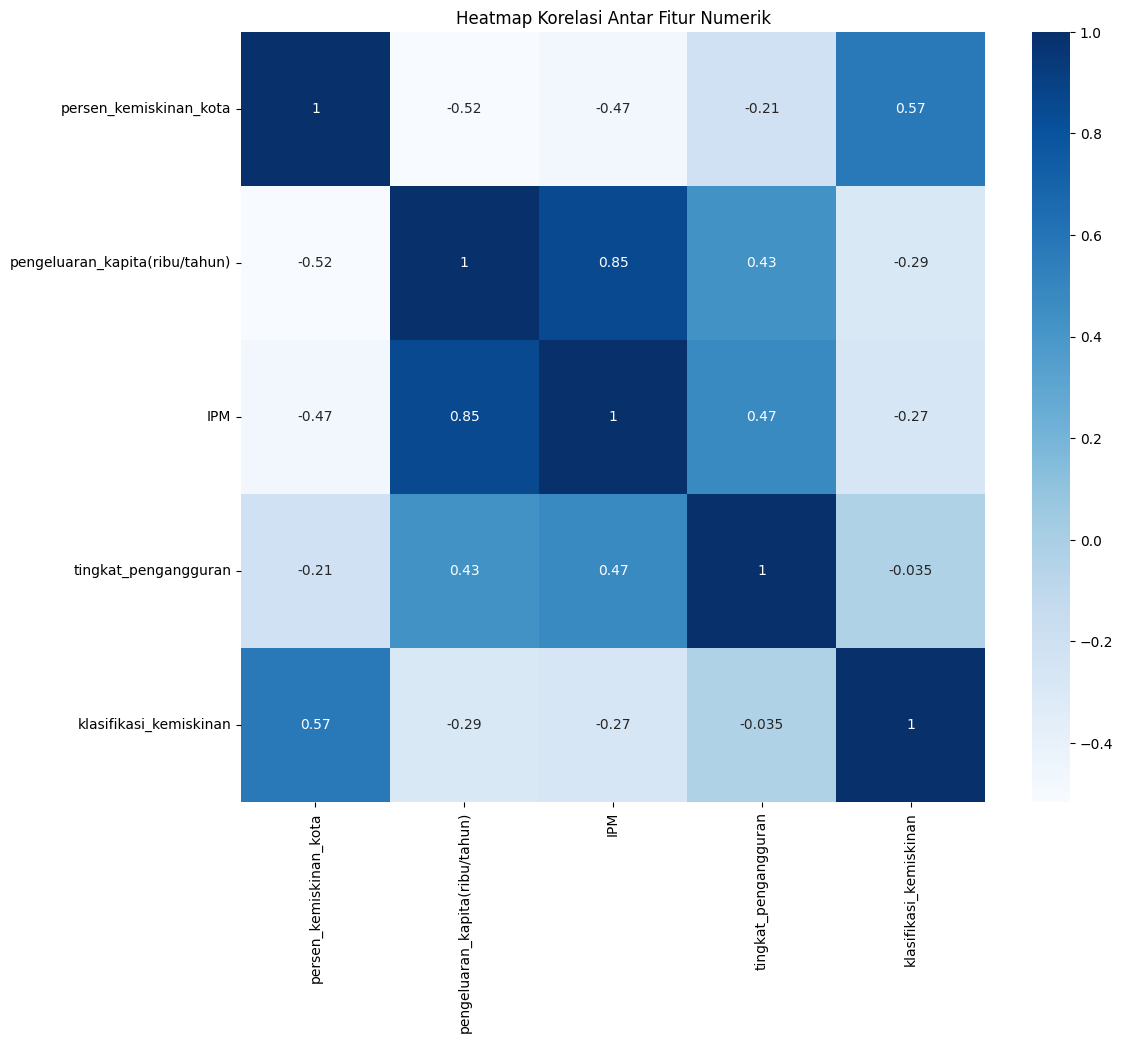

In [182]:
# Heatmap korelasi dengan palet biru
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='Blues')
plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.show()

##Data Preparation

In [183]:
# One hot encoding provinsi
df = pd.get_dummies(df, columns=['provinsi'])

In [184]:
# Menghapus kolom provinsi dan kab/kota
df.drop(columns=['kab/kota'], inplace=True)
df.columns

Index(['persen_kemiskinan_kota', 'pengeluaran_kapita(ribu/tahun)', 'IPM',
       'tingkat_pengangguran', 'klasifikasi_kemiskinan', 'provinsi_ACEH',
       'provinsi_BALI', 'provinsi_BANTEN', 'provinsi_BENGKULU',
       'provinsi_D I YOGYAKARTA', 'provinsi_DKI JAKARTA', 'provinsi_GORONTALO',
       'provinsi_JAMBI', 'provinsi_JAWA BARAT', 'provinsi_JAWA TENGAH',
       'provinsi_JAWA TIMUR', 'provinsi_KALIMANTAN BARAT',
       'provinsi_KALIMANTAN SELATAN', 'provinsi_KALIMANTAN TENGAH',
       'provinsi_KALIMANTAN TIMUR', 'provinsi_KALIMANTAN UTARA',
       'provinsi_KEP. BANGKA BELITUNG', 'provinsi_KEPULAUAN RIAU',
       'provinsi_LAMPUNG', 'provinsi_MALUKU', 'provinsi_MALUKU UTARA',
       'provinsi_NUSA TENGGARA BARAT', 'provinsi_NUSA TENGGARA TIMUR',
       'provinsi_PAPUA', 'provinsi_PAPUA BARAT', 'provinsi_RIAU',
       'provinsi_SULAWESI BARAT', 'provinsi_SULAWESI SELATAN',
       'provinsi_SULAWESI TENGAH', 'provinsi_SULAWESI TENGGARA',
       'provinsi_SULAWESI UTARA', 'provin

In [185]:
# Pisahkan kolom target klasifikasi
X = df.drop(columns=['klasifikasi_kemiskinan'])
y = df['klasifikasi_kemiskinan']

# Split data train dan test dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Melakukan normalisasi dengan menggunakan metode standard scaler agar data yang digunakan tidak memiliki penyimpangan yang besar.

In [186]:
# Normalisasi menggunakan standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [187]:
# Oversampling SMOTE agar data target balance
# Cek distribusi sebelum SMOTE
print("Distribusi sebelum SMOTE:", Counter(y_train))

# SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Cek distribusi setelah SMOTE
print("Distribusi setelah SMOTE:", Counter(y_train_smote))

Distribusi sebelum SMOTE: Counter({0: 336, 1: 23})
Distribusi setelah SMOTE: Counter({0: 336, 1: 336})


##Model Development

In [188]:
# Siapkan dataframe untuk menyimpan performa model
models = pd.DataFrame(index=['accuracy', 'precision', 'recall', 'f1_score'],
                      columns=['KNN', 'DecisionTree', 'RandomForest'], dtype='float')


###K-Nearest Neighbour

In [189]:
# train model KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_smote, y_train_smote)

y_train_pred_knn = knn.predict(X_train_smote)
y_test_pred_knn  = knn.predict(X_test_scaled)

# Performa model pada test set
accuracy_knn  = accuracy_score(y_test, y_test_pred_knn)
precison_knn = precision_score(y_test, y_test_pred_knn)
recall_knn = recall_score(y_test, y_test_pred_knn)
f1_score_knn  = f1_score(y_test, y_test_pred_knn, average='weighted')

# Simpan ke dataframe
models.loc['accuracy', 'KNN']   = accuracy_knn
models.loc['precision', 'KNN'] = precison_knn
models.loc['recall', 'KNN']    = recall_knn
models.loc['f1_score', 'KNN'] = f1_score_knn

###Decision Tree

In [190]:
# train model Decision Tree
dtree = DecisionTreeClassifier(random_state=42, max_depth=3)
dtree.fit(X_train_smote, y_train_smote)

y_train_pred_dt = dtree.predict(X_train_smote)
y_test_pred_dt  = dtree.predict(X_test_scaled)

# Performa model pada test set
accuracy_dt  = accuracy_score(y_test, y_test_pred_dt)
precison_dt = precision_score(y_test, y_test_pred_dt)
recall_dt = recall_score(y_test, y_test_pred_dt)
f1_score_dt  = f1_score(y_test, y_test_pred_dt, average='weighted')

# Simpan ke dataframe
models.loc['accuracy', 'DecisionTree']   = accuracy_dt
models.loc['precision', 'DecisionTree'] = precison_dt
models.loc['recall', 'DecisionTree']    = recall_dt
models.loc['f1_score', 'DecisionTree'] = f1_score_dt

###Random Forest

In [191]:
# train model Random Forest
rf = RandomForestClassifier(random_state=42, max_depth=3)
rf.fit(X_train_smote, y_train_smote)

y_train_pred_rf = rf.predict(X_train_smote)
y_test_pred_rf  = rf.predict(X_test_scaled)

# Performa model pada test set
accuracy_rf  = accuracy_score(y_test, y_test_pred_rf)
precison_rf = precision_score(y_test, y_test_pred_rf)
recall_rf = recall_score(y_test, y_test_pred_rf)
f1_score_rf  = f1_score(y_test, y_test_pred_rf, average='weighted')

# Simpan ke dataframe
models.loc['accuracy', 'RandomForest']   = accuracy_rf
models.loc['precision', 'RandomForest'] = precison_rf
models.loc['recall', 'RandomForest']    = recall_rf
models.loc['f1_score', 'RandomForest'] = f1_score_rf

##Evaluasi Model

In [192]:
print(models)

                KNN  DecisionTree  RandomForest
accuracy   0.922222      0.977778      0.966667
precision  0.454545      0.750000      0.666667
recall     0.833333      1.000000      1.000000
f1_score   0.932467      0.979231      0.969697


**Evaluasi Model Klasifikasi Kemiskinan:**

- **Decision Tree** terbukti menjadi model paling unggul untuk mengklasifikasikan kemiskinan. Dengan akurasi tinggi sebesar 0.978 dan recall sempurna (1.00), model ini mampu mendeteksi seluruh individu yang benar-benar tergolong miskin. Hal ini sangat penting dalam konteks penyaluran bantuan, karena tidak ada individu miskin yang terlewat. Walaupun precision-nya hanya 0.75—menandakan adanya beberapa kesalahan klasifikasi pada kategori tidak miskin—hal ini dipengaruhi oleh ketimpangan kelas dalam data. Namun, kemampuannya menangkap semua kasus miskin menjadikan Decision Tree sangat relevan untuk digunakan.

- **Random Forest** juga menunjukkan performa kuat dengan recall 1.00, namun precision-nya sedikit lebih rendah (0.667), sehingga berpotensi menghasilkan lebih banyak kesalahan dalam mengklasifikasikan individu tidak miskin sebagai miskin.

- Sebaliknya, **K-Nearest Neighbors** (KNN) mencatat performa terendah. Dengan precision hanya 0.455 dan recall 0.833, model ini cenderung banyak menghasilkan prediksi yang salah sasaran dan tidak berhasil mengidentifikasi sebagian individu miskin, sehingga kurang layak untuk digunakan dalam konteks ini.


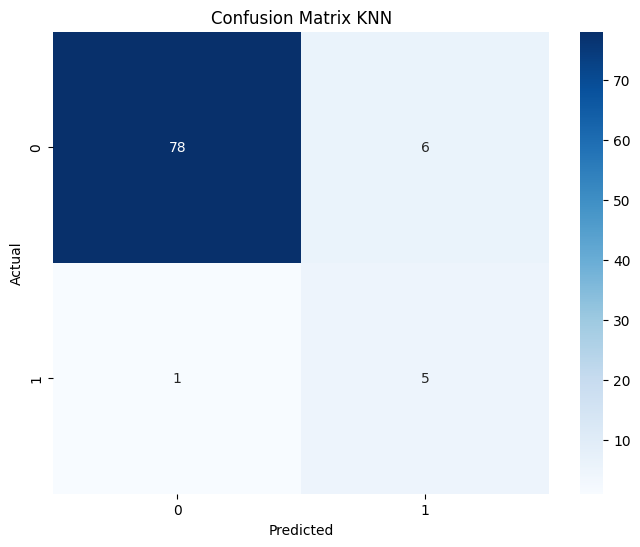

In [193]:
# Confusion matrix KNN
cm_knn = confusion_matrix(y_test, y_test_pred_knn)

# Visualisasi confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix KNN')
plt.show()

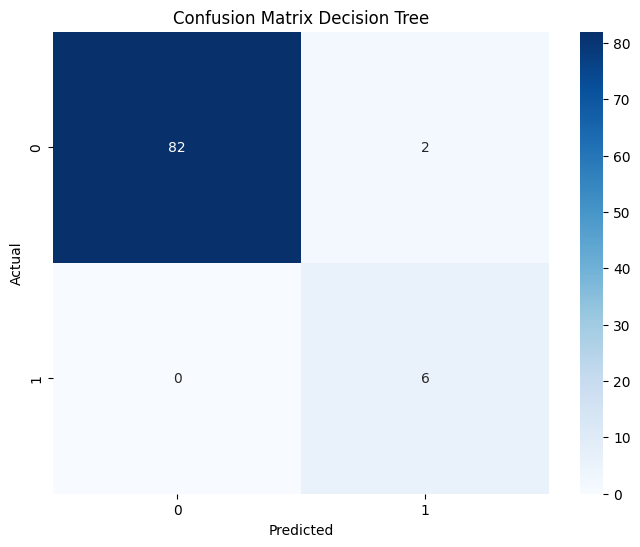

In [194]:
# Confussion matrix Decision tree
cm_dt = confusion_matrix(y_test, y_test_pred_dt)

# Visualisasi confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=dtree.classes_, yticklabels=dtree.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Decision Tree')
plt.show()

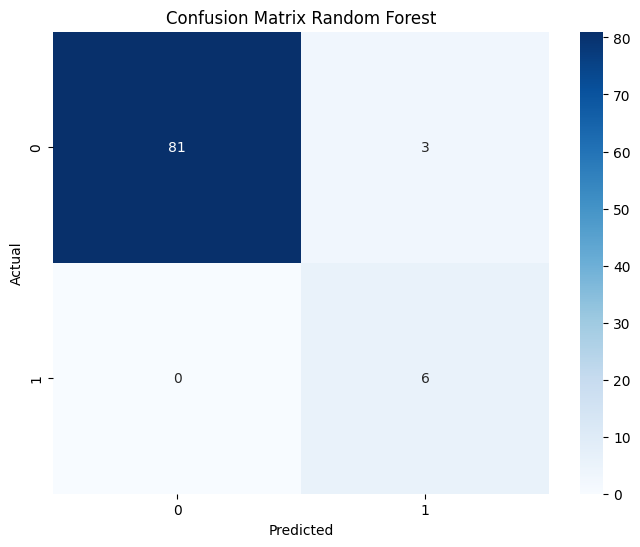

In [195]:
# Confussion matrix Random forest
cm_rf = confusion_matrix(y_test, y_test_pred_rf)

# Visualisasi confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Random Forest')
plt.show()